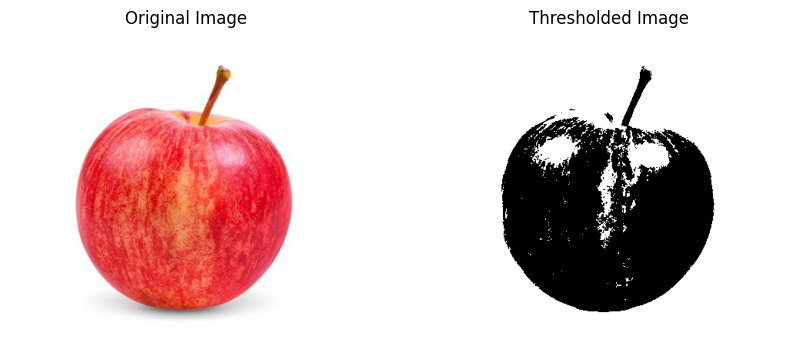

In [16]:

def thresholding(img, threshold_value=128):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary_image = np.zeros_like(gray_image)
    
    binary_image[gray_image >= threshold_value] = 255
    binary_image[gray_image < threshold_value] = 0
    
    return binary_image

threshold_value = 128 
segmented_image = thresholding(image, threshold_value)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Thresholded Image")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.show()


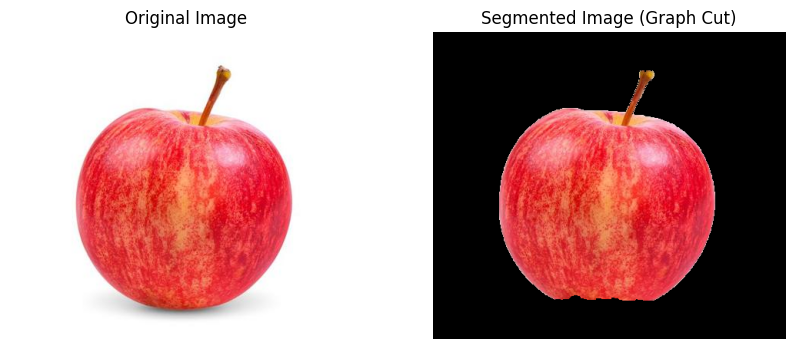

In [18]:

mask = np.zeros(image.shape[:2], np.uint8)

bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100) 

cv2.grabCut(image, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)

mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

segmented_image = image * mask_final[:, :, np.newaxis]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (Graph Cut)")
plt.axis("off")

plt.show()


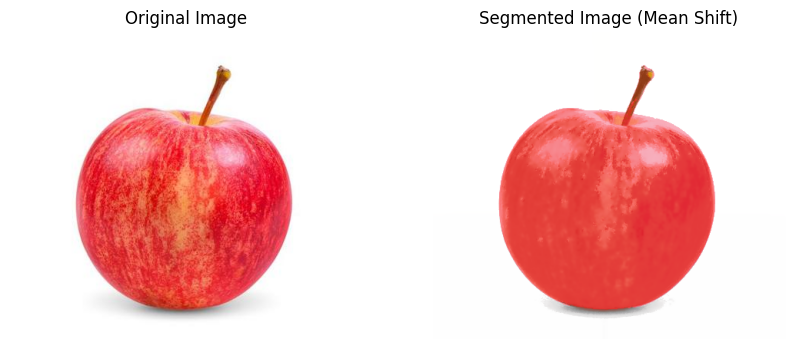

In [23]:

spatial_radius = 100 
color_radius = 30   
segmented_image = cv2.pyrMeanShiftFiltering(image, spatial_radius, color_radius)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (Mean Shift)")
plt.axis("off")

plt.show()


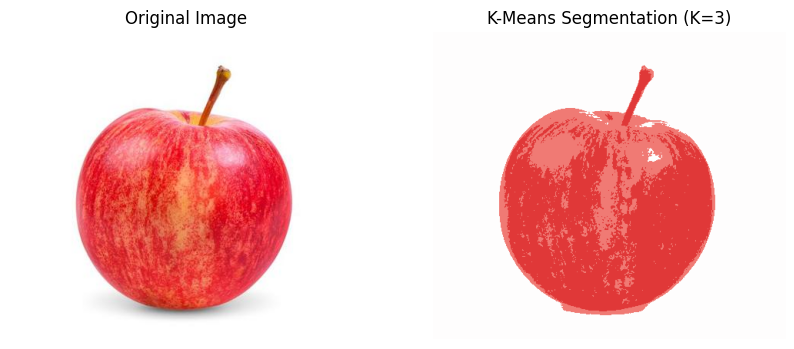

In [26]:


def k_means_segmentation(image, K=3, max_iter=10):
   
    pixels = image.reshape((-1, 3)).astype(np.float32)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, 1.0)
    _, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

   
    centers = np.uint8(centers)
    segmented_pixels = centers[labels.flatten()]
    
    # Reshape back to the original image shape
    segmented_image = segmented_pixels.reshape(image.shape)

    return segmented_image

K = 3
segmented_image = k_means_segmentation(image, K=K, max_iter=10)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"K-Means Segmentation (K={K})")
plt.axis("off")

plt.show()
